In [4]:
#pmdarima
# !pip install pmdarima

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import pmdarima as pm
from pmdarima.arima import ndiffs

In [2]:
data = pd.read_csv("./data/market/tr_eod_data_rounded.csv", index_col=0, parse_dates=True)
data

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,1096.35,NaN,NaN
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58


In [6]:
data_y = data.dropna()
data_y

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-04,30.57,30.95,20.88,133.90,173.08,113.33,1132.99,20.04,1.44,1120.00,47.71,109.80
2010-01-05,30.63,30.96,20.87,134.69,176.14,113.63,1136.52,19.35,1.44,1118.65,48.17,109.70
2010-01-06,30.14,30.77,20.80,132.25,174.26,113.71,1137.14,19.16,1.44,1138.50,49.34,111.51
2010-01-07,30.08,30.45,20.60,130.00,177.67,114.19,1141.69,19.06,1.43,1131.90,49.10,110.82
2010-01-08,30.28,30.66,20.83,133.52,174.31,114.57,1144.98,18.13,1.44,1136.10,49.84,111.37
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,182.17,98.39,50.71,1663.15,221.54,271.00,2717.07,17.33,1.17,1265.00,22.01,119.89
2018-06-26,184.43,99.08,49.67,1691.09,221.58,271.60,2723.06,15.92,1.16,1258.64,21.95,119.26
2018-06-27,184.16,97.54,48.76,1660.51,220.18,269.35,2699.63,17.91,1.16,1251.62,21.81,118.58


In [7]:
y = data_y[['AAPL.O']].iloc[-200:]
y

,AAPL.O
Date,
2017-09-14,158.28
2017-09-15,159.88
2017-09-18,158.67
2017-09-19,158.73
2017-09-20,156.07
...,...
2018-06-25,182.17
2018-06-26,184.43
2018-06-27,184.16


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y_train, y_test = train_test_split(y['AAPL.O'], test_size=0.3, shuffle=False, random_state=10)

In [10]:
y_train

Date
2017-09-14    158.28
2017-09-15    159.88
2017-09-18    158.67
2017-09-19    158.73
2017-09-20    156.07
               ...  
2018-03-29    167.78
2018-04-02    166.68
2018-04-03    168.39
2018-04-04    171.61
2018-04-05    172.80
Name: AAPL.O, Length: 140, dtype: float64

In [11]:
y_test

Date
2018-04-06    168.38
2018-04-09    170.05
2018-04-10    173.25
2018-04-11    172.44
2018-04-12    174.14
2018-04-13    174.73
2018-04-16    175.82
2018-04-17    178.24
2018-04-18    177.84
2018-04-19    172.80
2018-04-20    165.72
2018-04-23    165.24
2018-04-24    162.94
2018-04-25    163.65
2018-04-26    164.22
2018-04-27    162.32
2018-04-30    165.26
2018-05-01    169.10
2018-05-02    176.57
2018-05-03    176.89
2018-05-04    183.83
2018-05-07    185.16
2018-05-08    186.05
2018-05-09    187.36
2018-05-10    190.04
2018-05-11    188.59
2018-05-14    188.15
2018-05-15    186.44
2018-05-16    188.18
2018-05-17    186.99
2018-05-18    186.31
2018-05-21    187.63
2018-05-22    187.16
2018-05-23    188.36
2018-05-24    188.15
2018-05-25    188.58
2018-05-29    187.90
2018-05-30    187.50
2018-05-31    186.87
2018-06-01    190.24
2018-06-04    191.83
2018-06-05    193.31
2018-06-06    193.98
2018-06-07    193.46
2018-06-08    191.70
2018-06-11    191.23
2018-06-12    192.28
2018-06-

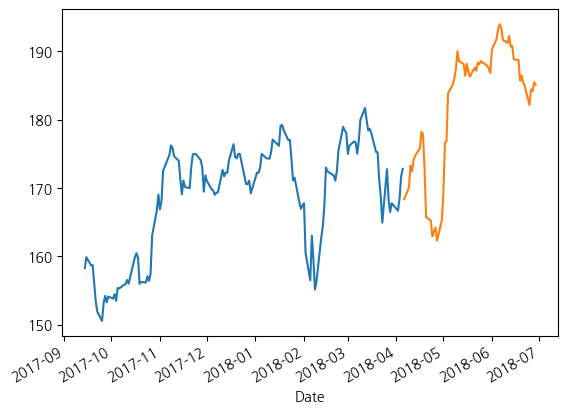

In [12]:
y_train.plot()
y_test.plot()
plt.show()

# 정상성 검정 및 차분 수 구하기

In [14]:
# alpha = 유의수준, test=['kpss', 'adf'], max_d= 차분 횟수 max= 6
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)

In [15]:
kpss_diffs

1

In [16]:
adf_diffs

1

In [17]:
# 정상 시계열로 만들기 위한 차분 횟수
n_diffs = max(kpss_diffs, adf_diffs)

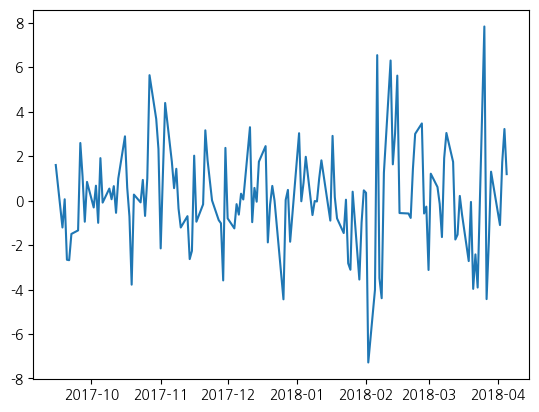

In [23]:
plt.plot(y_train.diff(1))

In [24]:
model = pm.auto_arima(y_train, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=632.062, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=633.161, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=632.943, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=630.345, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=633.865, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.654 seconds


In [25]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  140
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -314.172
Date:                Mon, 14 Oct 2024   AIC                            630.345
Time:                        14:21:43   BIC                            633.279
Sample:                             0   HQIC                           631.537
                                - 140                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.3795      0.509     10.576      0.000       4.383       6.376
===================================================================================
Ljung-Box (L1) (Q):                   0.92   Jarque-Bera (JB):                 9.58
Prob(Q):                              0.34   Prob(JB):                         0.01
Heteroskedasticity (H):               2.64   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

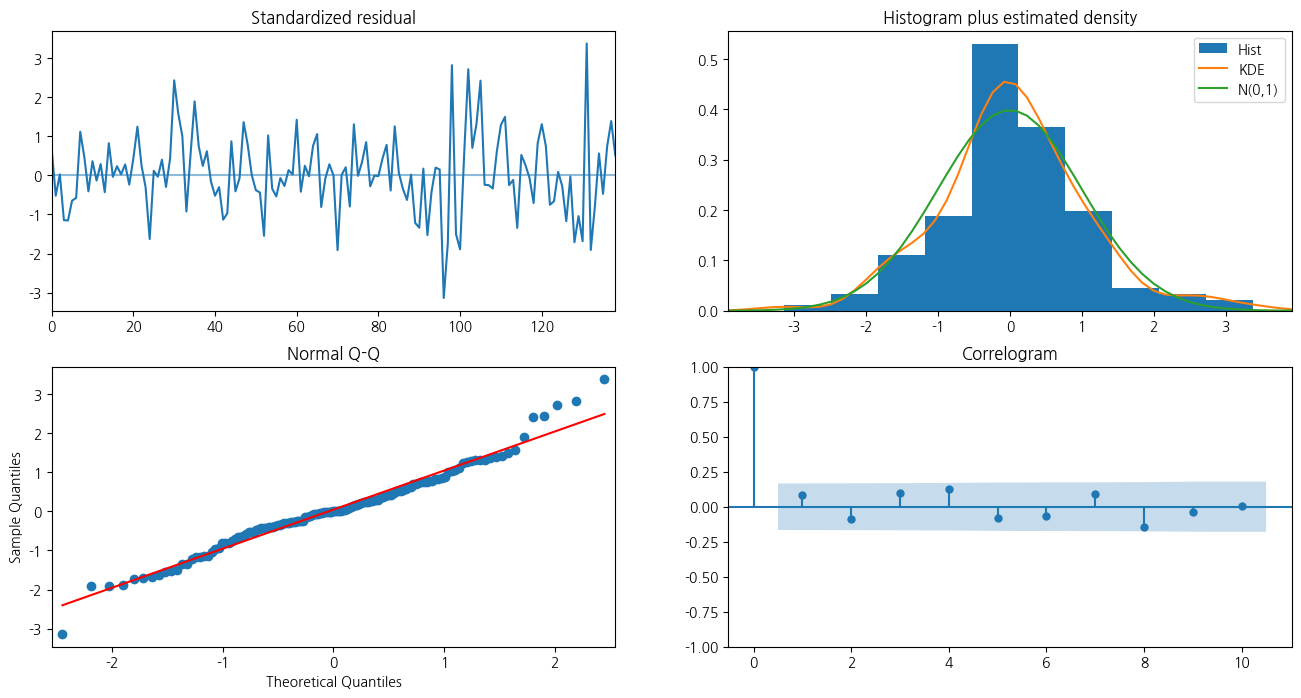

In [28]:
model.plot_diagnostics(figsize=(16,8))
plt.show()

In [29]:
len(y_test)

60

In [30]:
# y_test 기간 = 60일
y_pred = model.predict(n_periods=len(y_test))

C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [31]:
y_pred

140    172.8
141    172.8
142    172.8
143    172.8
144    172.8
145    172.8
146    172.8
147    172.8
148    172.8
149    172.8
150    172.8
151    172.8
152    172.8
153    172.8
154    172.8
155    172.8
156    172.8
157    172.8
158    172.8
159    172.8
160    172.8
161    172.8
162    172.8
163    172.8
164    172.8
165    172.8
166    172.8
167    172.8
168    172.8
169    172.8
170    172.8
171    172.8
172    172.8
173    172.8
174    172.8
175    172.8
176    172.8
177    172.8
178    172.8
179    172.8
180    172.8
181    172.8
182    172.8
183    172.8
184    172.8
185    172.8
186    172.8
187    172.8
188    172.8
189    172.8
190    172.8
191    172.8
192    172.8
193    172.8
194    172.8
195    172.8
196    172.8
197    172.8
198    172.8
199    172.8
dtype: float64

# 모델 업데이트 

In [32]:
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    print(fc, conf_int)
    return (fc.tolist()[0], np.asarray(conf_int).tolist()[0])

In [33]:
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])
    ## 모델 업데이트
    model.update(new_ob)

C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


140    172.8
dtype: float64 [[168.25410778 177.34589222]]
[168.38] [[163.79161161 172.96838839]]
[170.05] [[165.46960968 174.63039032]]
[173.25] [[168.65549731 177.84450269]]
[172.44] [[167.85969017 177.02030983]]
[174.14] [[169.56718242 178.71281758]]
[174.73] [[170.17196841 179.28803159]]
[175.82] [[171.27416448 180.36583552]]
[178.24] [[173.69279142 182.78720858]]
[177.84] [[173.30772473 182.37227527]]
[172.8] [[168.21103959 177.38896041]]
[165.72] [[161.00812492 170.43187508]]
[165.24] [[160.54311667 169.93688333]]
[162.94] [[158.24430812 167.63569188]]
[163.65] [[158.96835346 168.33164654]]
[164.22] [[159.55271025 168.88728975]]
[162.32] [[157.65818277 166.98181723]]
[165.26] [[160.59029557 169.92970443]]
[169.1] [[164.40660287 173.79339713]]
[176.57] [[171.74868216 181.39131784]]
[176.89] [[172.08359738 181.69640262]]
[183.83] [[178.91945762 188.74054238]]
[185.16] [[180.26041571 190.05958429]]
[186.05] [[181.16363938 190.93636062]]
[187.36] [[182.48450154 192.23549846]]
[190.04]

In [35]:
final_result = pd.DataFrame(dict(test=y_test, pred=y_pred))
final_result

,test,pred
Date,,
2018-04-06,168.38,172.80
2018-04-09,170.05,168.38
2018-04-10,173.25,170.05
2018-04-11,172.44,173.25
2018-04-12,174.14,172.44
2018-04-13,174.73,174.14
2018-04-16,175.82,174.73
2018-04-17,178.24,175.82
2018-04-18,177.84,178.24


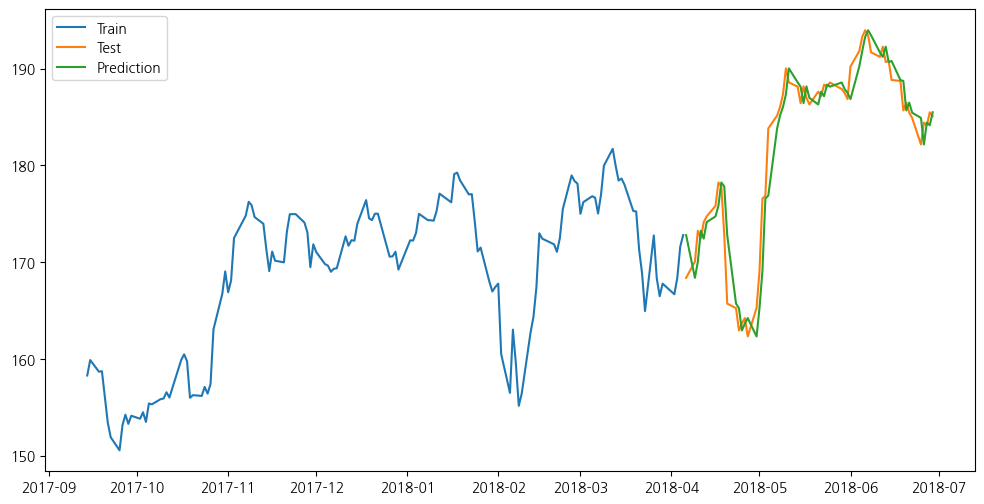

In [41]:
fig, axes = plt.subplots(1,1, figsize=(12,6))
plt.plot(y_train, label="Train")
plt.plot(y_test, label="Test")
plt.plot(final_result['pred'], label="Prediction")
plt.legend()
plt.show()

# 2차 분석

In [42]:
model2 = pm.auto_arima(y_train, d=1, start_p=0, max_p=5, start_q=0, max_q=5, m=1,
                       seasonal=False, stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=632.062, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=633.161, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=632.943, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=630.345, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=633.865, Time=0.07 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.180 seconds


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=632.062, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=633.161, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=632.943, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=630.345, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=633.865, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.554 seconds


C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


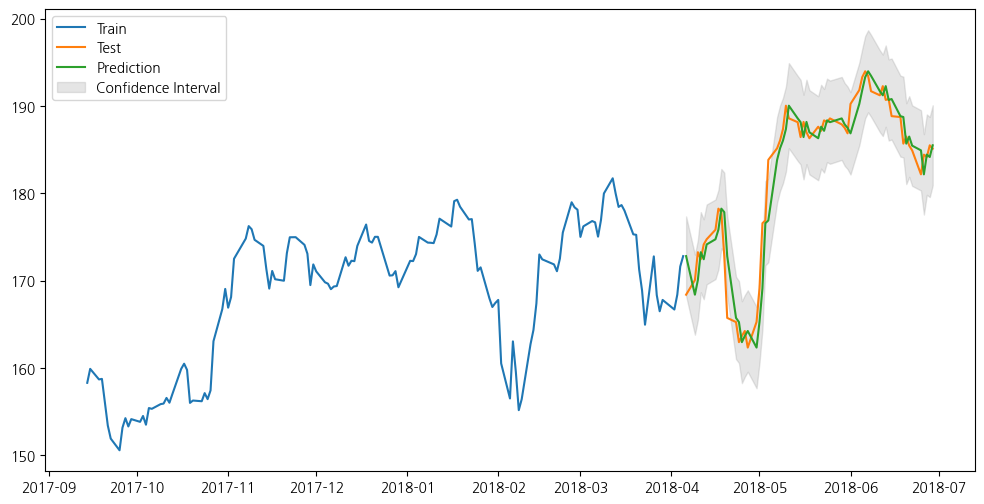

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import pmdarima as pm
from pmdarima.arima import ndiffs

# 데이터 로드 및 전처리
data = pd.read_csv("./data/market/tr_eod_data_rounded.csv", index_col=0, parse_dates=True)
data_y = data.dropna()
y = data_y[['AAPL.O']].iloc[-200:]

# 훈련 및 테스트 데이터 분리
from sklearn.model_selection import train_test_split
y_train, y_test = train_test_split(y['AAPL.O'], test_size=0.3, shuffle=False, random_state=10)

# 차분 횟수 계산
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(kpss_diffs, adf_diffs)

# ARIMA 모델 학습
model = pm.auto_arima(y_train, d=n_diffs, trace=True)

# 예측 및 모델 업데이트 함수
def forecast_one_step():
    fc, conf_int = model.predict(n_periods=1, return_conf_int=True)
    return (fc.tolist()[0], np.asarray(conf_int).tolist()[0])

# 예측 결과 저장 변수 초기화
forecasts = []
y_pred = []
pred_upper = []
pred_lower = []

# 테스트 데이터에 대한 예측 및 모델 업데이트
for new_ob in y_test:
    fc, conf = forecast_one_step()
    y_pred.append(fc)
    pred_upper.append(conf[1])
    pred_lower.append(conf[0])
    model.update(new_ob)

# 예측 결과 DataFrame 생성
final_result = pd.DataFrame(dict(test=y_test, pred=y_pred))

# 시각화
fig, axes = plt.subplots(1,1, figsize=(12,6))
plt.plot(y_train, label="Train")
plt.plot(y_test, label="Test")
plt.plot(final_result['pred'], label="Prediction")
plt.fill_between(final_result.index, pred_lower, pred_upper, color='gray', alpha=0.2, label="Confidence Interval")
plt.legend()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=632.062, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=633.161, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=632.943, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=630.345, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=633.865, Time=0.08 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.629 seconds


C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\5-29\miniforge3\envs\fintech\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


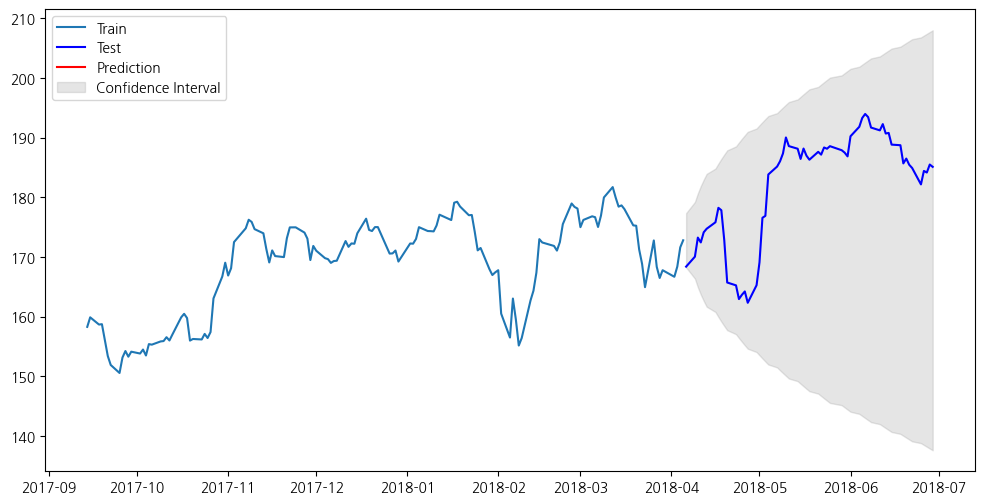

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import pmdarima as pm
from pmdarima.arima import ndiffs

# 데이터 로드 및 전처리
data = pd.read_csv("./data/market/tr_eod_data_rounded.csv", index_col=0, parse_dates=True)
data_y = data.dropna()
y = data_y[['AAPL.O']].iloc[-200:]

# 훈련 및 테스트 데이터 분리
from sklearn.model_selection import train_test_split
y_train, y_test = train_test_split(y['AAPL.O'], test_size=0.3, shuffle=False, random_state=10)

# 차분 횟수 계산
kpss_diffs = ndiffs(y_train, alpha=0.05, test='kpss', max_d=6)
adf_diffs = ndiffs(y_train, alpha=0.05, test='adf', max_d=6)
n_diffs = max(kpss_diffs, adf_diffs)

# ARIMA 모델 학습
model = pm.auto_arima(y_train, d=n_diffs, trace=True)

# 테스트 데이터 전체 기간에 대한 예측
n_periods = len(y_test)
y_pred, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# 예측 결과 DataFrame 생성
final_result = pd.DataFrame({
    'test': y_test.values,  # 실제 값
    'pred': y_pred,  # 예측 값
    'pred_upper': conf_int[:, 1],  # 신뢰 구간 상한
    'pred_lower': conf_int[:, 0]   # 신뢰 구간 하한
}, index=y_test.index)  # 인덱스를 y_test와 맞추기

# 시각화
fig, axes = plt.subplots(1,1, figsize=(12,6))
plt.plot(y_train, label="Train")
plt.plot(y_test, label="Test", color='blue')
plt.plot(final_result['pred'], label="Prediction", color='red')
plt.fill_between(final_result.index, final_result['pred_lower'], final_result['pred_upper'], color='gray', alpha=0.2, label="Confidence Interval")
plt.legend()
plt.show()
